<a href="https://colab.research.google.com/github/mietekdom/Nepal_Solar-Radiation-Measurments/blob/main/Nepal_solar_radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Import data**

In [26]:
df = pd.read_csv('https://energydata.info/dataset/ead8d2fa-de59-48d3-8693-817b36b3a470/resource/ef17f691-0256-497d-a5ee-3c6a334ae1e2/download/solar-measurements_nepal_dharan_wb-esmap_qc.csv',
                 index_col=0, parse_dates=True)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
time,,,,,,,,,,,,,
2018-07-01 00:01:00,0.0,NaN,NaN,26.7,95.0,2.5,3.2,8.2,27.9,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:02:00,0.0,NaN,NaN,26.7,94.5,2.3,2.9,7.5,24.3,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:03:00,0.0,NaN,NaN,26.7,94.3,2.4,3.2,9.0,20.7,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:04:00,0.0,NaN,NaN,26.7,94.3,2.5,2.9,8.9,15.6,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:05:00,0.0,NaN,NaN,26.8,94.2,2.1,2.9,7.4,15.4,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...


**Rain analysis**

In [27]:
df_time = df[['rain']]
df_time.head

<bound method NDFrame.head of                      rain
time                     
2018-07-01 00:01:00   0.0
2018-07-01 00:02:00   0.0
2018-07-01 00:03:00   0.0
2018-07-01 00:04:00   0.0
2018-07-01 00:05:00   0.0
...                   ...
2020-04-30 23:56:00   0.0
2020-04-30 23:57:00   0.0
2020-04-30 23:58:00   0.0
2020-04-30 23:59:00   0.0
2020-05-01 00:00:00   0.0

[964800 rows x 1 columns]>

In [47]:
rain_2018 = df_time.loc['2018']
rain_2019 = df_time.loc['2019']
rain_2020 = df_time.loc['2020']
rain_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    525600 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


In [50]:
rain_2019_day = rain_2019.resample('D').mean()
rain_2019_day

,rain
time,
2019-01-01,0.000000
2019-01-02,0.000000
2019-01-03,0.000000
2019-01-04,0.000000
2019-01-05,0.000000
...,...
2019-12-27,0.000069
2019-12-28,0.000000
2019-12-29,0.000000


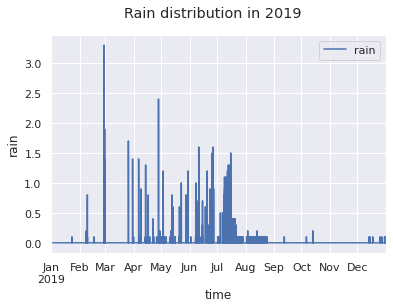

In [51]:
_ = rain_2019.plot()
_ = plt.suptitle('Rain distribution in 2019')
_ = plt.xlabel('time')
_ = plt.ylabel('rain')

In [54]:
rain_2019_month = rain_2019.resample('M').mean()
rain_2019_month

,rain
time,
2019-01-31,0.000002
2019-02-28,0.001873
2019-03-31,0.000842
2019-04-30,0.002317
2019-05-31,0.001570
2019-06-30,0.003606
2019-07-31,0.015898
2019-08-31,0.001086
2019-09-30,0.000002


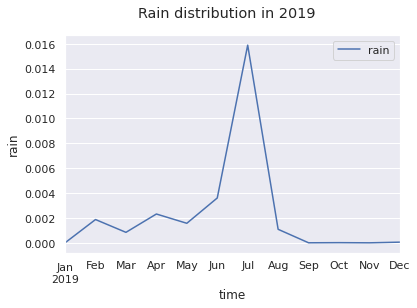

In [55]:
_ = rain_2019_month.plot()
_ = plt.suptitle('Rain distribution in 2019')
_ = plt.xlabel('time')
_ = plt.ylabel('rain')

In [68]:
rain_2019_month = rain_2019.resample('M').mean().reset_index()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
rain_2019_month['month'] = month
rain_2019_month

,time,rain,month
0,2019-01-31,0.000002,January
1,2019-02-28,0.001873,February
2,2019-03-31,0.000842,March
3,2019-04-30,0.002317,April
4,2019-05-31,0.001570,May
5,2019-06-30,0.003606,June
6,2019-07-31,0.015898,July
7,2019-08-31,0.001086,August
8,2019-09-30,0.000002,September
9,2019-10-31,0.000013,October


In [69]:
px.scatter(data_frame=rain_2019_month, x='month', y='rain',
           width=1000, height=600)